### Explore data

In [1]:
from tqdm import tqdm
import numpy as np

##### FWD

In [57]:
root = 'data/'

for filename in os.listdir(root):
    with open(root + filename) as file:
        train = [line.rstrip('\n') for line in file]

    tr_total, tr_unique, max_len = 0, 0, 0
    all_lens = []
    for line in tqdm(train):
        splitted = line.split('|')
        number, examples = splitted[0], splitted[1]
        examples = examples.split('\t')
        for el in examples:
            len_now = len(el.split(' '))
            if len_now > max_len:
                max_len = len_now
            all_lens.append(len_now)

        tr_total += int(number)
        tr_unique += 1


    print('Total examples generated in ' + filename, f'{tr_total:,}')
    print('Unique examples fed to model in ' + filename, f'{tr_unique:,}')
    print('Max len in ' + filename, max_len)
    print('Mean len in ' + filename, np.mean(all_lens))
    print('-' * 100)

100%|██████████| 9986/9986 [00:00<00:00, 192828.69it/s]


Total examples generated in prim_fwd.valid 1,558,675
Unique examples fed to model in prim_fwd.valid 9,985
Max len in prim_fwd.valid 505
Mean len in prim_fwd.valid 36.8164747120681
----------------------------------------------------------------------------------------------------
Total examples generated in prim_fwd.test 1,237,312
Unique examples fed to model in prim_fwd.test 9,986
Max len in prim_fwd.test 506
Mean len in prim_fwd.test 36.28840376527138
----------------------------------------------------------------------------------------------------


100%|██████████| 45339899/45339899 [04:06<00:00, 184269.46it/s]


Total examples generated in prim_fwd.train 112,106,299
Unique examples fed to model in prim_fwd.train 45,339,899
Max len in prim_fwd.train 510
Mean len in prim_fwd.train 39.564734070362064
----------------------------------------------------------------------------------------------------


### Results and metrics

In [30]:
import seaborn as sns
sns.set()
import os

In [37]:
root = '../dumped/base/'

runs = []
for filename in os.listdir(root):
    run_name = root + filename + '/train.log'
    print(run_name)
    runs.append(run_name)

../dumped/base/180202/train.log


In [38]:
root = '../dumped/first_seq-rel-att/'

#runs = []
for filename in os.listdir(root):
    if filename == '180015':
        run_name = root + filename + '/train.log'
        print(run_name)
        runs.append(run_name)

../dumped/first_seq-rel-att/180015/train.log


In [47]:
import datetime
import json

is_end=False

runs_dict = {}

for name in runs:
    file = open(name)
    lines = [line.rstrip('\n') for line in file]
    whole_dict = {'time':[]}
    for line in lines:
        if '__log__' in line:
            time = line.split()[5]
            if len(time) == 1:     # day num
                line_split = line.split()
                day, time = line_split[5], line_split[7]
                time = datetime.datetime.strptime(time, '%H:%M:%S')
                time = int(day) * 24 + (time.hour * 60 + time.minute) / 60
            else:
                time = datetime.datetime.strptime(time, '%H:%M:%S')
                time = (time.hour * 60 + time.minute) / 60
            if time > 70:
                is_end=True
                break 
            
            whole_dict['time'].append(time)
            json_line = json.loads(line[line.find('{'):])
            for key in json_line:
                if key not in whole_dict:
                    whole_dict[key] = []
                whole_dict[key].append(json_line[key])
    runs_dict[name.split('/')[3]] = whole_dict

In [48]:
names = {'180202':'base', 
         '180015':'seq_rel_att'
        }

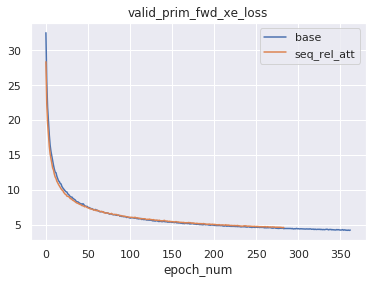

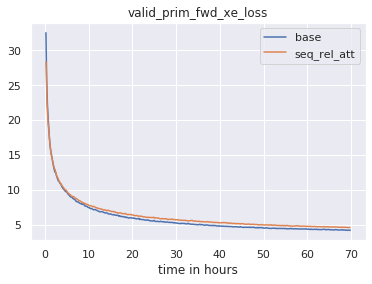

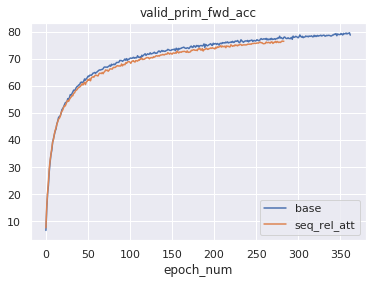

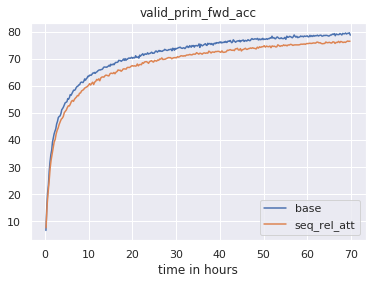

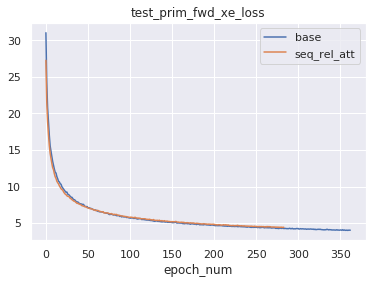

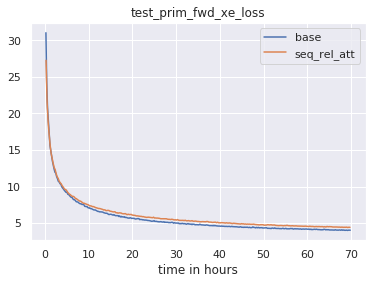

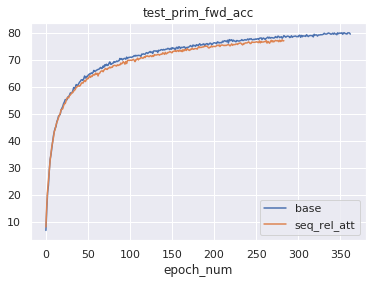

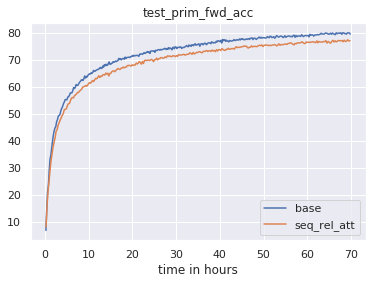

In [49]:
import matplotlib.pyplot as plt


needed = ['valid_prim_fwd_acc', 'valid_prim_fwd_xe_loss', 'test_prim_fwd_xe_loss', 'test_prim_fwd_acc']
for key in whole_dict:
    for run in runs_dict.keys():
        if key in needed:
            plt.plot(
                runs_dict[run]['epoch'],
                runs_dict[run][key], 
                label=names[run]
            )
            plt.xlabel('epoch_num')
            plt.title(key)
            plt.legend()
            
    plt.show()
    
    for run in runs_dict.keys():
        if key in needed:
            plt.plot(
                runs_dict[run]['time'],
                runs_dict[run][key],
                label=names[run]
            )
            plt.xlabel('time in hours')
            plt.title(key)
            plt.legend()
            
    plt.show()

In [50]:
root = 'dumped/first_eval/'

runs = []
for filename in os.listdir(root):
    run_name = root + filename + '/train.log'
    runs.append(run_name)

FileNotFoundError: [Errno 2] No such file or directory: 'dumped/first_eval/'

In [11]:
import datetime
import json

runs_dict = {}

for name in runs:
    file = open(name)
    lines = [line.rstrip('\n') for line in file]
    whole_dict = {'time':[]}
    for line in lines:
        if '__log__' in line:
            time = line.split()[5]
            time = datetime.datetime.strptime(time, '%H:%M:%S')
            time = (time.hour * 60 + time.minute) / 60
            whole_dict['time'].append(time)

            json_line = json.loads(line[line.find('{'):])
            for key in json_line:
                if key not in whole_dict:
                    whole_dict[key] = []
                whole_dict[key].append(json_line[key])   
    runs_dict[name.split('/')[2]] = whole_dict

ValueError: time data '1' does not match format '%H:%M:%S'

In [12]:
import matplotlib.pyplot as plt


needed = ['valid_prim_fwd_beam_acc', 'test_prim_fwd_beam_acc']
for key in whole_dict:
    for run in runs_dict.keys():
        if key in needed:
            print(key, runs_dict[run][key])